In [1]:
#Titanic Kaggle

import pandas as pd

datos = pd.read_csv("titanic_data.csv")

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

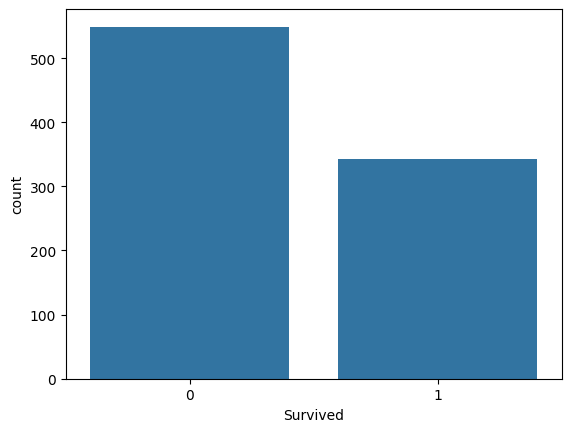

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

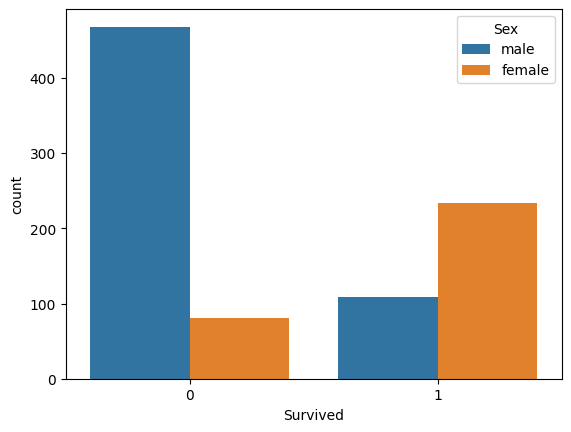

In [5]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [6]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


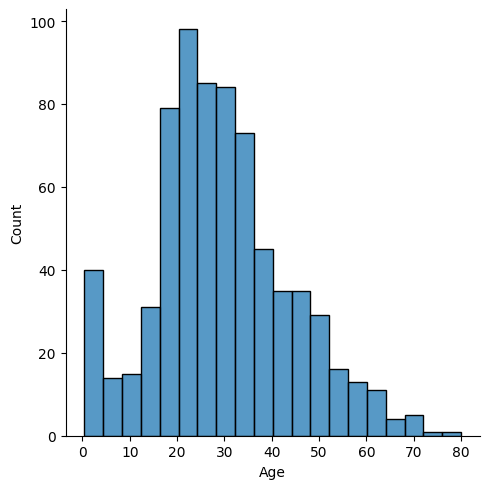

In [7]:
sb.displot(x="Age", data=datos)

In [8]:
#Vamos a intentar llenar los 177 registros sin datos de edad colocando un promedio
datos["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [9]:
#El promedio de edad de los pasajeron del titanic es de 29 años
#Vamos a llenar los 177 datos de edad vacíos con dicho promedio
datos["Age"].mean()

29.69911764705882

In [10]:
#.fillna sirve para rellenar los registros vacíos
#Entre las parentesis se coloca el dato a rellenar
datos["Age"].fillna(datos["Age"].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [11]:
#Se actualiza la columna Age por el promedio de edad anteriormente preprocesado
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [12]:
#Se visualiza la actualización de la columna
datos["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [13]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
#Eliminación de la columna Cabin, puesto que es irrelevante para el modelo y la mayoría es NaN
datos = datos.drop(["Cabin"], axis=1)

In [15]:
datos["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [16]:
datos = datos.dropna()

In [17]:
#Tenemos que seguir limpiando la tabla de datos
#Columnas a eliminar: PassengerId, Name, Ticket
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#Eliminación de golpe de las tres columnas
#Axis=1 especifica que son columnas
datos = datos.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [19]:
#Las columnas fueron eliminadas
#Ahora hay que convertir la columna de sexo en datos numéricos
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
#Se convierte a valor númerico booleano
#female 0, male 1
#Para forzar el retorno de datos númericos booleanos: dtype=int
pd.get_dummies(datos["Sex"], dtype=int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [21]:
#Es reduntante la existencia de dos columnas
#Si es hombre es 1, y sino lo es 0, por lo tanto es mujer
#Para limpiar la columna usamos: drop_first=True
pd.get_dummies(datos["Sex"], drop_first=True, dtype=int)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [22]:
#Almacenamiento del dato anterior en una variable
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True, dtype=int)

In [23]:
#Agregaremos la nueva columna
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

In [24]:
#Actulización de la tabla para ver los cambios reflejados
#Los únicos datos que no están en números es ela columna de Embarked
#Por lo tanto hay que verificar su relevancia
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

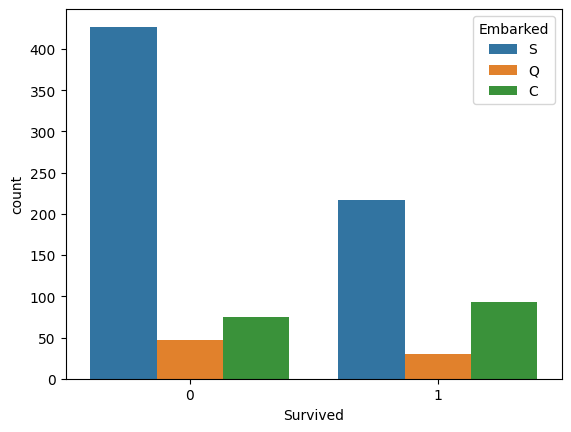

In [25]:
#No queda muy claro la relevancia de la posibilidad de supervivencia
#con el puerto de embarcación
#Como los datos son no numéricos toca volver a hacer dummies
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [26]:
#De igual forma se crea la variable para los dummies de embarked
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True, dtype=int)

In [27]:
#Se integran los nuevos datos a la tabla y se elimina la anterior columna
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

In [28]:
#Vemos la tabla para visualizar lso cambios
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

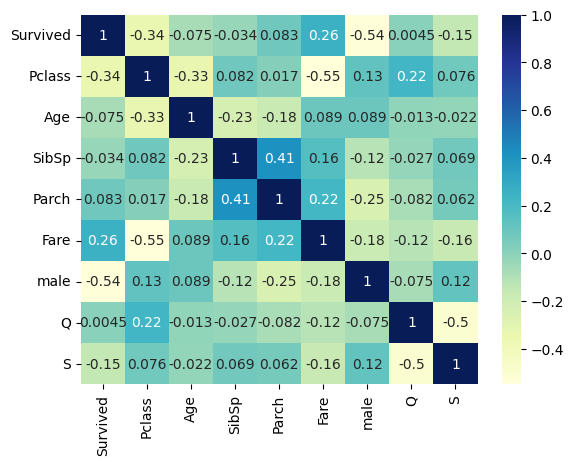

In [29]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

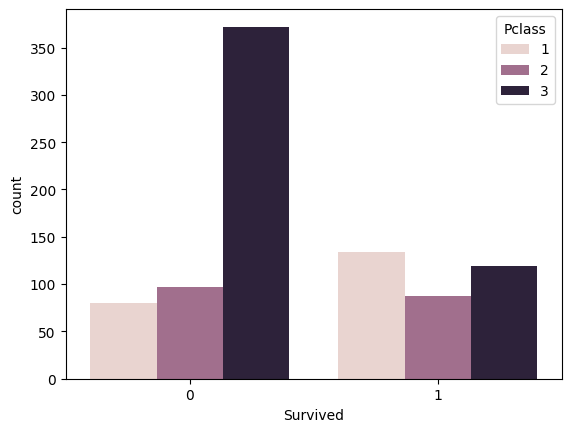

In [30]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [31]:
#Separación de X y y
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [32]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X,  y, test_size=.2)

In [33]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7921348314606742

In [40]:
from sklearn.tree import DecisionTreeClassifier

resultado = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultado.append(exactitud)

Resultado para 1: 0.8033707865168539
Resultado para 2: 0.797752808988764
Resultado para 3: 0.8146067415730337
Resultado para 4: 0.8146067415730337
Resultado para 5: 0.797752808988764
Resultado para 6: 0.797752808988764
Resultado para 7: 0.7921348314606742
Resultado para 8: 0.8089887640449438
Resultado para 9: 0.8089887640449438
Resultado para 10: 0.8033707865168539
Resultado para 11: 0.797752808988764
Resultado para 12: 0.8033707865168539
Resultado para 13: 0.797752808988764
Resultado para 14: 0.797752808988764


<Axes: >

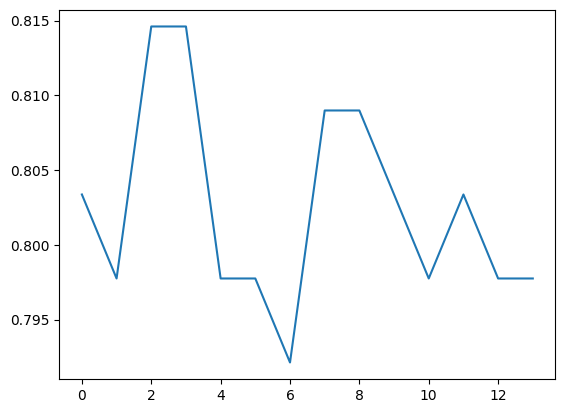

In [41]:
sb.lineplot(data=resultado)

In [42]:
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       103
           1       0.90      0.63      0.74        75

    accuracy                           0.81       178
   macro avg       0.84      0.79      0.80       178
weighted avg       0.83      0.81      0.81       178



In [44]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,98,5
Real: Si,28,47


In [47]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.5089285714285714, 0.9, 'male <= 0.5\n0.468\n711\n[446, 265]\nMurió'),
 Text(0.2857142857142857, 0.7, 'Pclass <= 2.5\n0.398\n244\n[67, 177]\nVivió'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'Age <= 2.5\n0.105\n126\n[7, 119]\nVivió'),
 Text(0.07142857142857142, 0.3, 'Parch <= 1.5\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.03571428571428571, 0.1, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.10714285714285714, 0.1, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.21428571428571427, 0.3, 'Age <= 56.5\n0.092\n124\n[6, 118]\nVivió'),
 Text(0.17857142857142858, 0.1, '0.079\n121\n[5, 116]\nVivió'),
 Text(0.25, 0.1, '0.444\n3\n[1, 2]\nVivió'),
 Text(0.42857142857142855, 0.5, 'S <= 0.5\n0.5\n118\n[60, 58]\nMurió'),
 Text(0.35714285714285715, 0.3, 'Age <= 30.85\n0.408\n49\n[14, 35]\nVivió'),
 Text(0.32142857142857145, 0.1, '0.364\n46\n[11, 35]\nVivió'),
 Text(0.39285714285714285, 0.1, '0.0\n3\n[3, 0]\nMurió'),
 Text(0.5, 0.3, 'Fare <= 22.738\n0.444\n69\n[46, 23]\nMurió'),
 Text(0.464285714

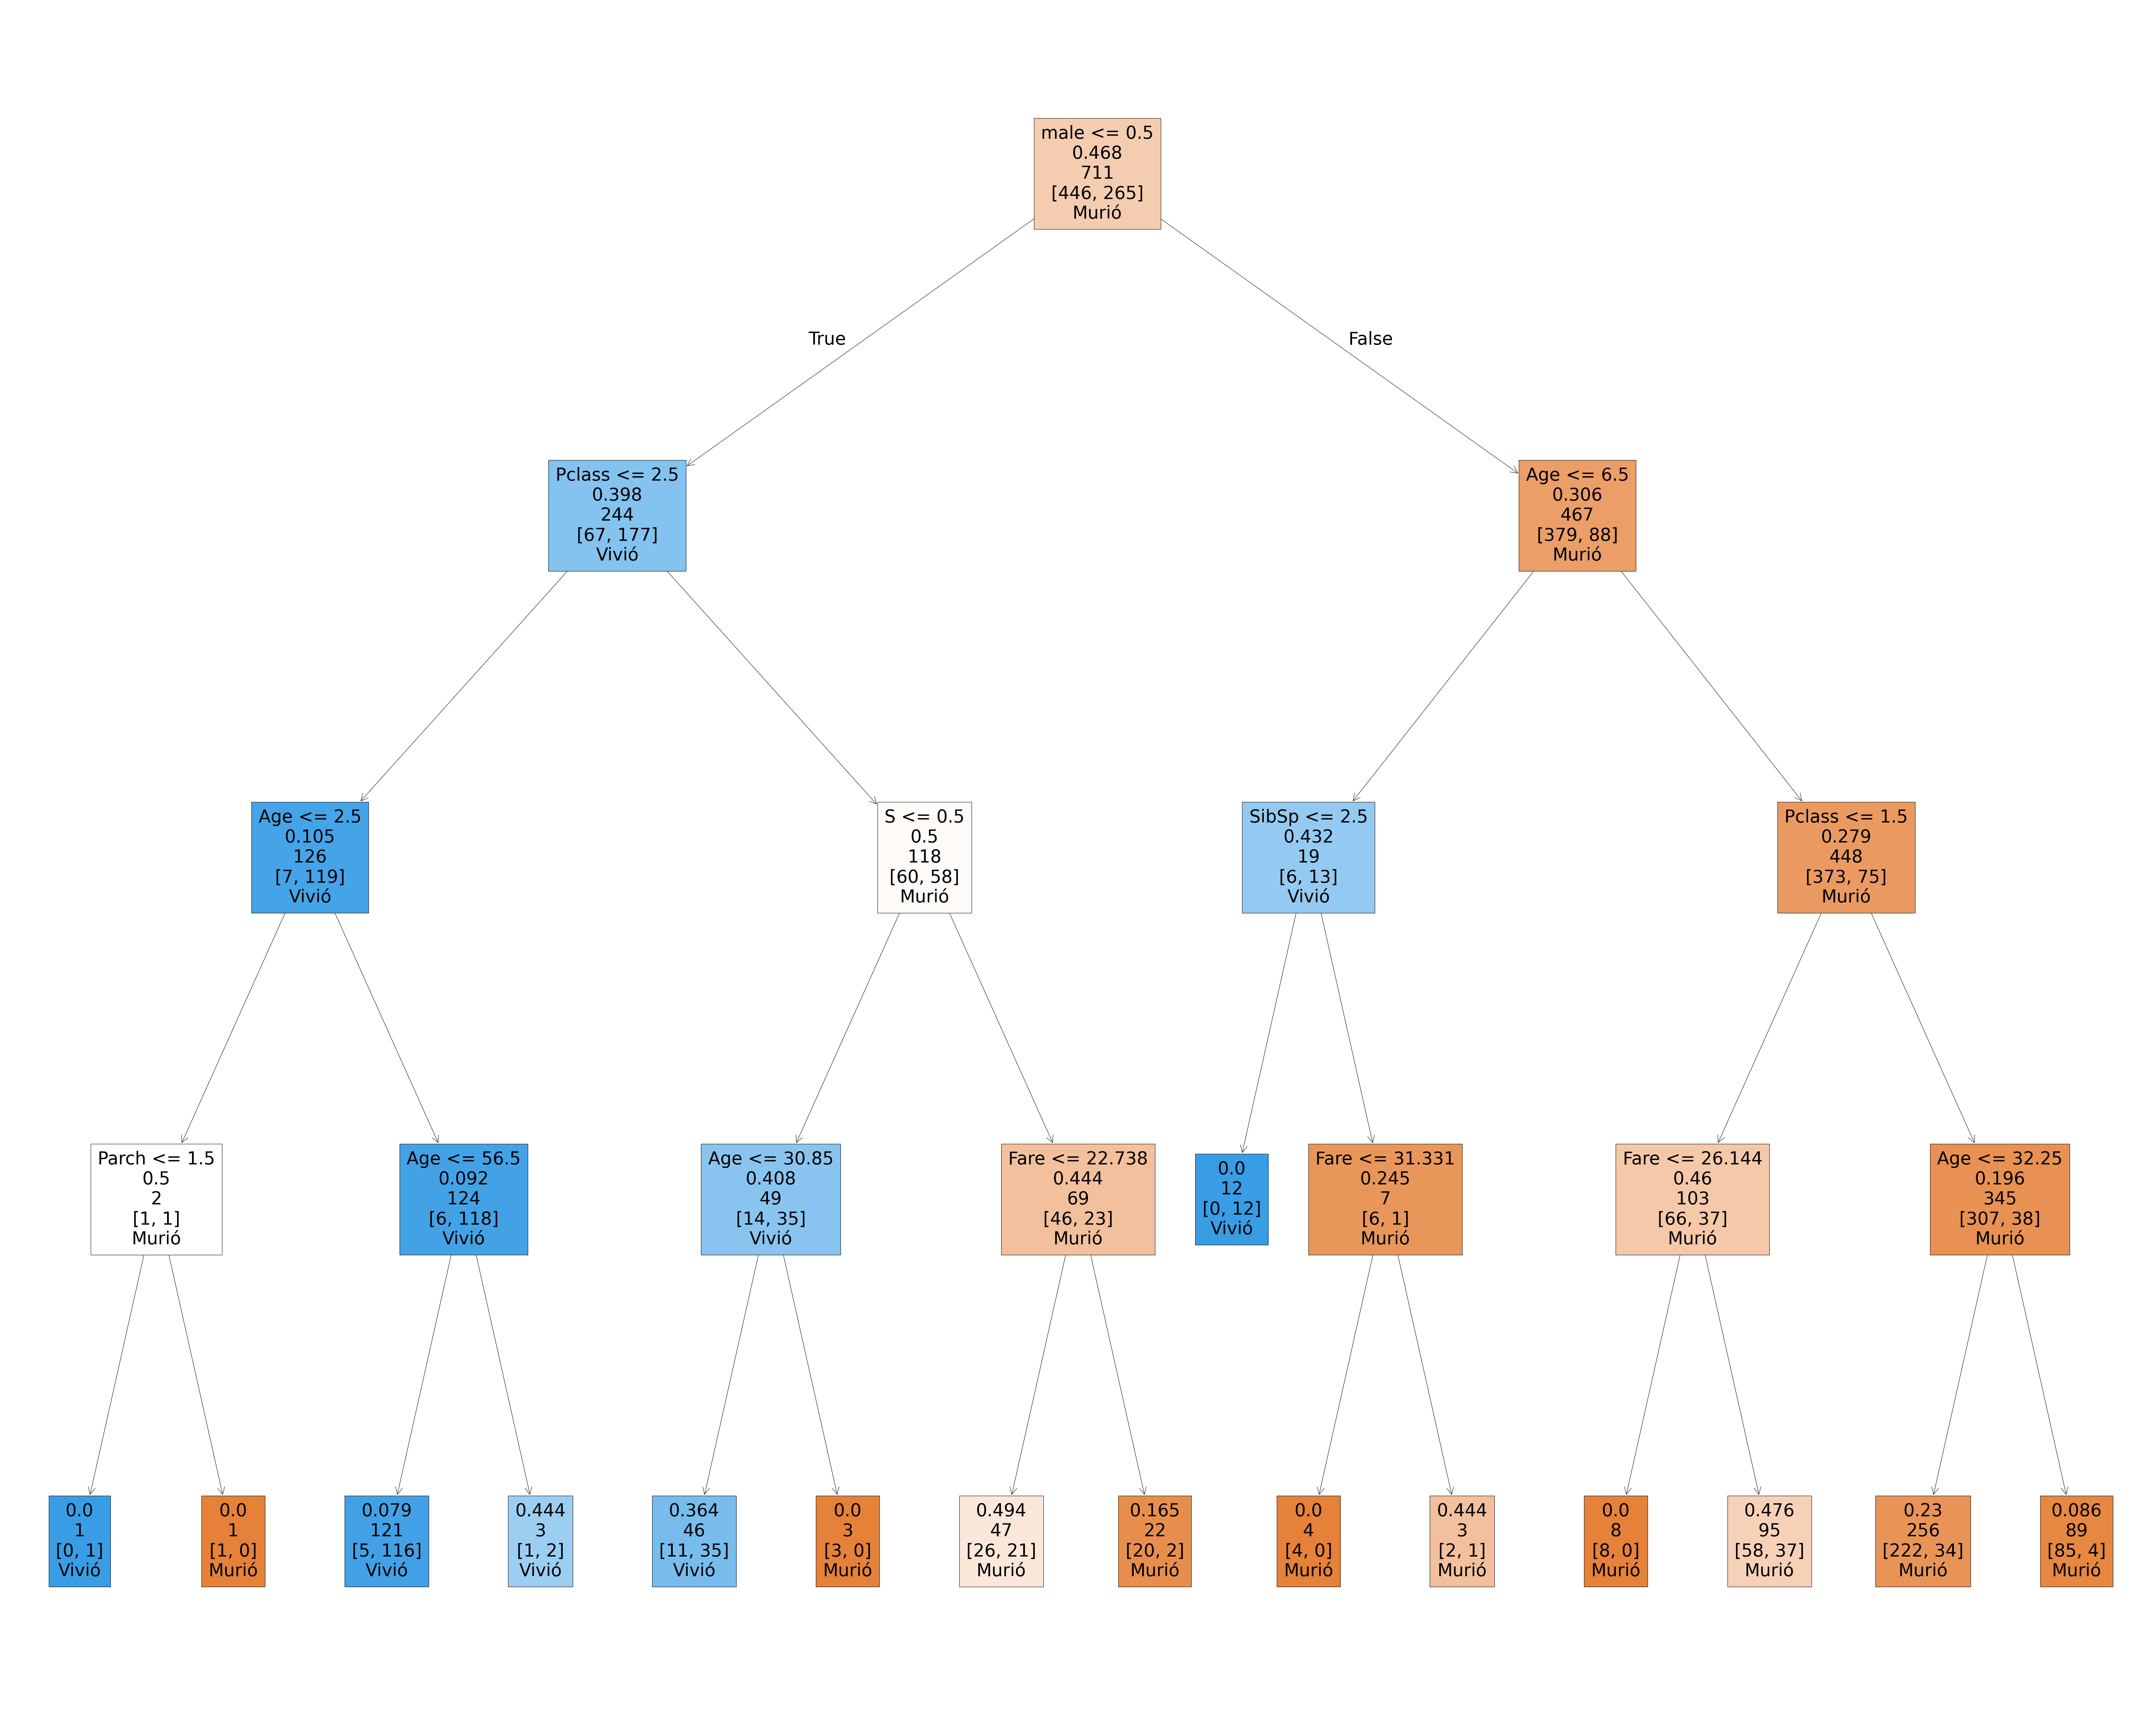

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names = X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)